In [3]:

import pandas as pd
df = pd.read_csv('savant_data2.csv')
df


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length
0,SI,2024-07-06,93.1,-2.71,4.59,"Ryan, Joe",676694,657746,walk,ball,...,7,3,7,Standard,Standard,223.0,-0.017,0.292,NaN,NaN
1,SI,2024-07-06,93.0,-2.71,4.50,"Ryan, Joe",676694,657746,NaN,foul,...,7,3,7,Standard,Standard,227.0,0.000,0.000,49.569988,4.84817
2,FS,2024-07-06,89.8,-2.73,4.62,"Ryan, Joe",676694,657746,NaN,blocked_ball,...,7,3,7,Standard,Standard,250.0,0.000,0.109,NaN,NaN
3,SI,2024-07-06,93.7,-2.68,4.56,"Ryan, Joe",676694,657746,NaN,foul,...,7,3,7,Standard,Standard,225.0,0.000,0.000,75.403317,6.98722
4,ST,2024-07-06,82.9,-2.69,4.63,"Ryan, Joe",676694,657746,NaN,ball,...,7,3,7,Standard,Standard,60.0,0.000,0.062,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,FF,2024-06-30,94.1,-3.17,4.84,"Scott, Tayler",668901,605463,NaN,swinging_strike,...,5,5,5,Standard,Standard,240.0,0.000,-0.117,67.611261,6.30715
24996,KC,2024-06-30,80.3,2.39,6.29,"Paxton, James",681584,572020,NaN,called_strike,...,1,1,0,Standard,Standard,309.0,0.000,-0.047,NaN,NaN
24997,SI,2024-06-30,94.4,-1.39,5.66,"Houser, Adrian",643289,605288,NaN,foul,...,4,4,4,Standard,Standard,227.0,0.000,-0.020,69.853345,7.71950
24998,FF,2024-06-30,95.9,-2.30,5.84,"Cole, Gerrit",643376,543037,NaN,called_strike,...,0,0,4,Standard,Standard,207.0,0.000,-0.041,NaN,NaN


In [4]:
first_pitches = df[df['pitch_number'] == 1]

# Calculate percentage of balls
total_first_pitches = len(first_pitches)
balls_count = len(first_pitches[first_pitches['type'] == 'B'])
balls_percentage = (balls_count / total_first_pitches) * 100

print(f"Percentage of first pitches that are balls: {balls_percentage:.2f}%")

Percentage of first pitches that are balls: 37.80%


In [5]:
first_pitches = df[df['pitch_number'] == 1]

# Calculate strike percentage per pitch type
strike_percentages = first_pitches[first_pitches['type'] == 'S'].groupby('pitch_name').size() / len(first_pitches) * 100

# Sort pitches by strike percentage in descending order
best_pitches = strike_percentages.sort_values(ascending=False)

print("Best pitches for first pitch strikes:")
print(best_pitches)


Best pitches for first pitch strikes:
pitch_name
4-Seam Fastball    17.446409
Sinker              9.122203
Slider              8.120795
Cutter              4.537631
Curveball           3.520576
Changeup            3.051166
Sweeper             2.753873
Knuckle Curve       0.907526
Split-Finger        0.641527
Slurve              0.203411
Knuckleball         0.125176
Eephus              0.031294
Other               0.015647
dtype: float64


In [6]:
import pandas as pd

# Assuming df is your original DataFrame

# Step 1: Initial filtering and pitch type counts
filtered_data = df[(df['p_throws'] == 'R') & (df['stand'] == 'L') & (df['pitch_number'] == 1)]
pitch_counts = filtered_data['pitch_type'].value_counts()

# Step 2: Filter to include only pitch types thrown at least 100 times
valid_pitch_types = pitch_counts[pitch_counts >= 100].index
filtered_data = filtered_data[filtered_data['pitch_type'].isin(valid_pitch_types)]

# Step 3: Calculate strike percentages
strike_counts = filtered_data[filtered_data['type'] == 'S'].groupby('pitch_type').size()
total_counts = filtered_data.groupby('pitch_type').size()
strike_percentages = (strike_counts / total_counts) * 100

# Display strike percentages for all valid pitch types
for pitch_type, strike_percentage in strike_percentages.items():
    print(f"Pitch Type: {pitch_type}")
    print(f"Strike Percentage: {strike_percentage:.2f}%")
    print("---------------------------------")


Pitch Type: CH
Strike Percentage: 42.57%
---------------------------------
Pitch Type: CU
Strike Percentage: 49.08%
---------------------------------
Pitch Type: FC
Strike Percentage: 43.72%
---------------------------------
Pitch Type: FF
Strike Percentage: 48.61%
---------------------------------
Pitch Type: SI
Strike Percentage: 49.25%
---------------------------------
Pitch Type: SL
Strike Percentage: 50.76%
---------------------------------


/tmp/ipykernel_352/3537095232.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(strike_percentages.index, rotation=45, ha='right')
/tmp/ipykernel_352/3537095232.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(strike_percentages.index, rotation=45, ha='right')
/tmp/ipykernel_352/3537095232.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(strike_percentages.index, rotation=45, ha='right')
/tmp/ipykernel_352/3537095232.py:55: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(strike_percentages.index, rotation=45, ha='right')


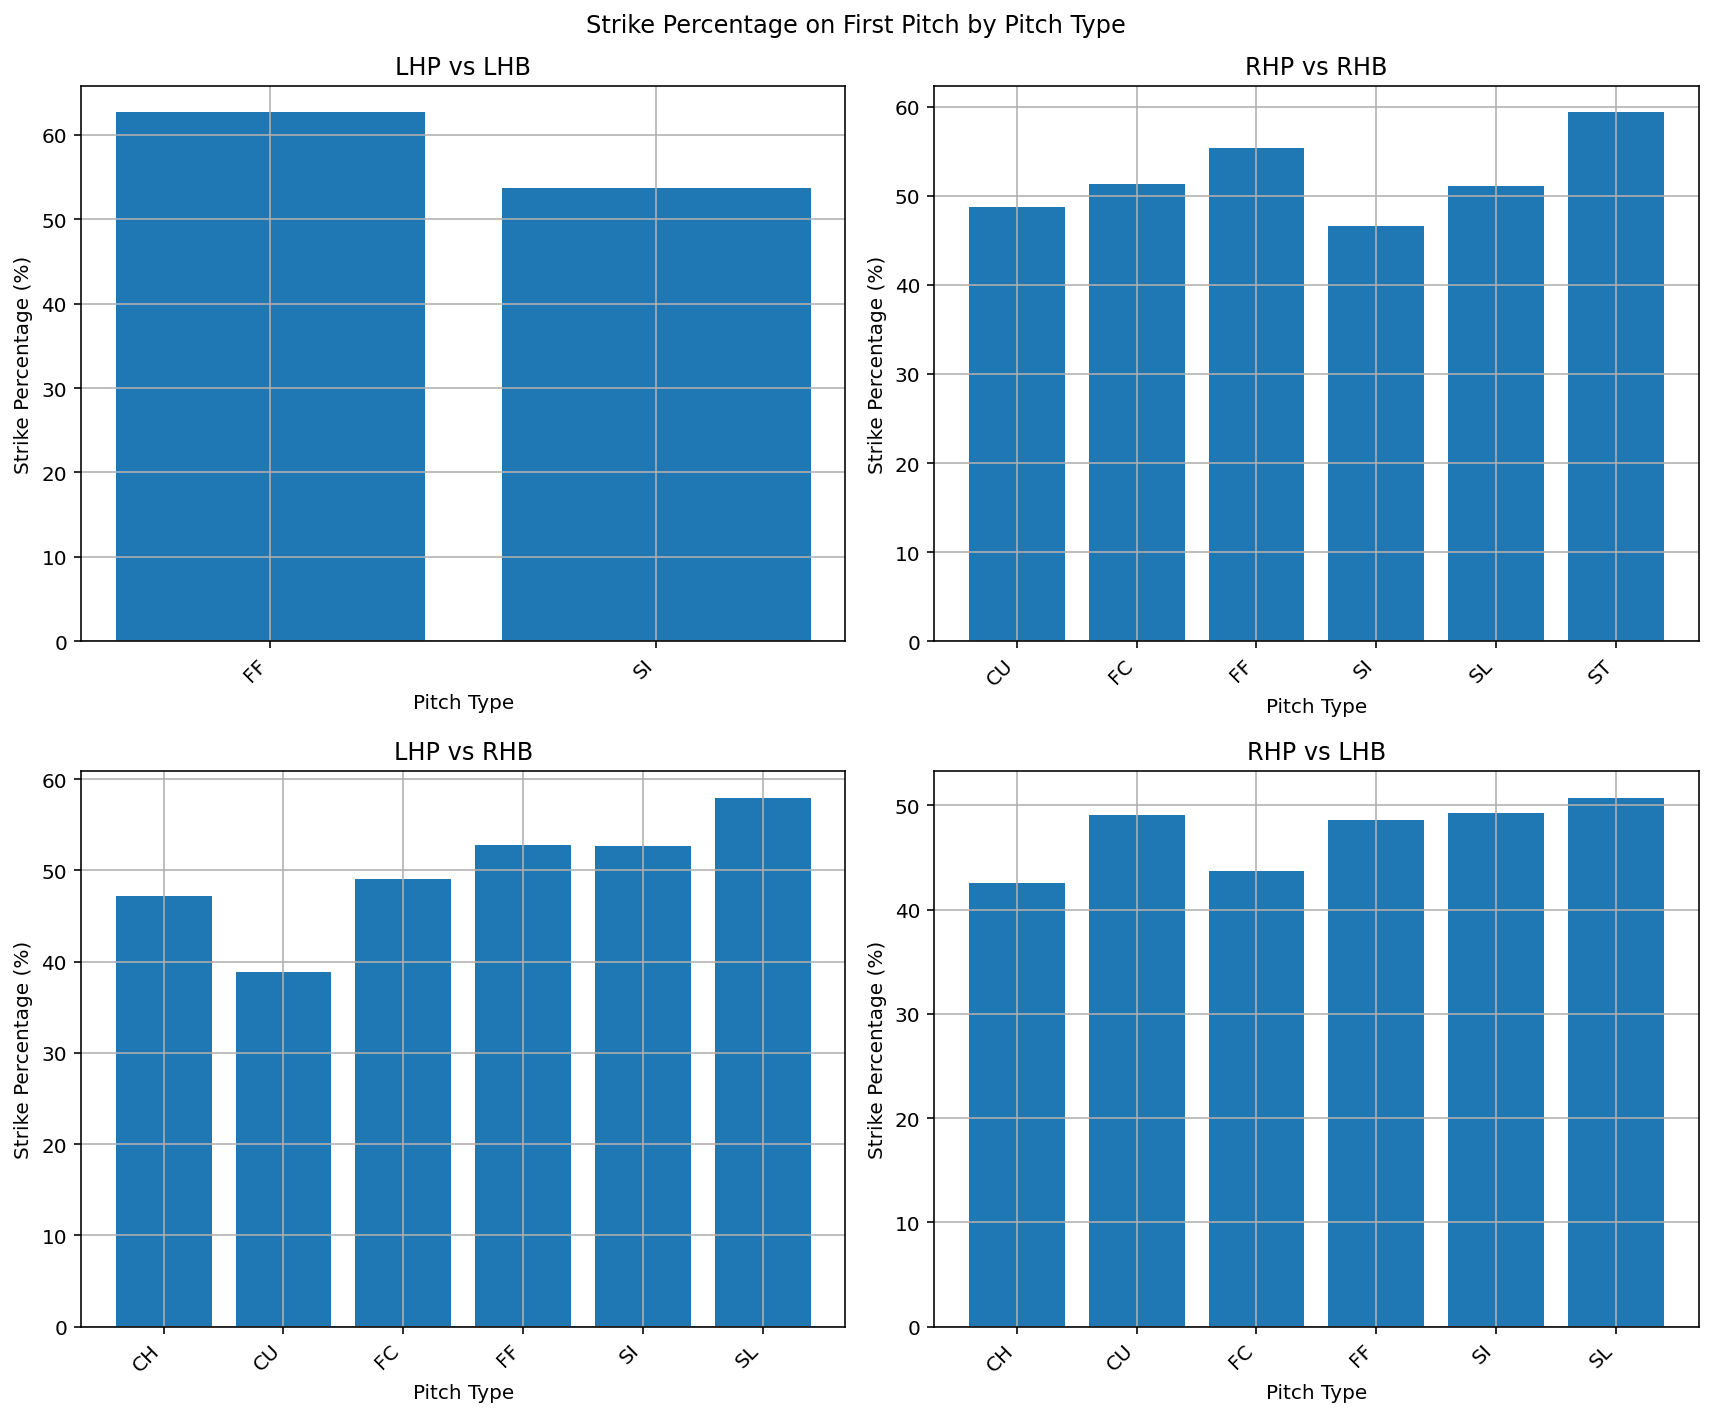

In [7]:
import matplotlib.pyplot as plt
matchups = [
    {'p_throws': 'R', 'stand': 'L', 'title': 'RHP vs LHB'},
    {'p_throws': 'R', 'stand': 'R', 'title': 'RHP vs RHB'},
    {'p_throws': 'L', 'stand': 'L', 'title': 'LHP vs LHB'},
    {'p_throws': 'L', 'stand': 'R', 'title': 'LHP vs RHB'},
]

# Initialize a figure for plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Strike Percentage on First Pitch by Pitch Type')

# Initialize a dictionary to store mean strike percentages
mean_strike_percentages = {}

# Loop through each matchup
for idx, matchup in enumerate(matchups):
    # Filter data for the current matchup
    filtered_data = df[(df['p_throws'] == matchup['p_throws']) & (df['stand'] == matchup['stand']) & (df['pitch_number'] == 1)]
    
    # Count occurrences of each pitch type
    pitch_counts = filtered_data['pitch_type'].value_counts()
    
    # Filter to include only pitch types thrown at least 100 times
    valid_pitch_types = pitch_counts[pitch_counts >= 100].index
    filtered_data = filtered_data[filtered_data['pitch_type'].isin(valid_pitch_types)]
    
    # Calculate strike percentage for each pitch type
    strike_counts = filtered_data[filtered_data['type'] == 'S'].groupby('pitch_type').size()
    total_counts = filtered_data.groupby('pitch_type').size()
    strike_percentages = (strike_counts / total_counts) * 100
    
    # Store mean strike percentage for this matchup
    mean_strike_percentages[matchup['title']] = strike_percentages.mean()

# Sort matchups by mean strike percentage in descending order
sorted_matchups = sorted(mean_strike_percentages.items(), key=lambda x: x[1], reverse=True)

# Plotting sorted matchups
for idx, (title, _) in enumerate(sorted_matchups):
    matchup = next(m for m in matchups if m['title'] == title)
    filtered_data = df[(df['p_throws'] == matchup['p_throws']) & (df['stand'] == matchup['stand']) & (df['pitch_number'] == 1)]
    pitch_counts = filtered_data['pitch_type'].value_counts()
    valid_pitch_types = pitch_counts[pitch_counts >= 100].index
    filtered_data = filtered_data[filtered_data['pitch_type'].isin(valid_pitch_types)]
    strike_counts = filtered_data[filtered_data['type'] == 'S'].groupby('pitch_type').size()
    total_counts = filtered_data.groupby('pitch_type').size()
    strike_percentages = (strike_counts / total_counts) * 100
    
    ax = axs[idx // 2, idx % 2]
    ax.bar(strike_percentages.index, strike_percentages.values)
    ax.set_title(matchup['title'])
    ax.set_xlabel('Pitch Type')
    ax.set_ylabel('Strike Percentage (%)')
    ax.set_xticklabels(strike_percentages.index, rotation=45, ha='right')
    ax.grid(True)

plt.tight_layout()
plt.show()

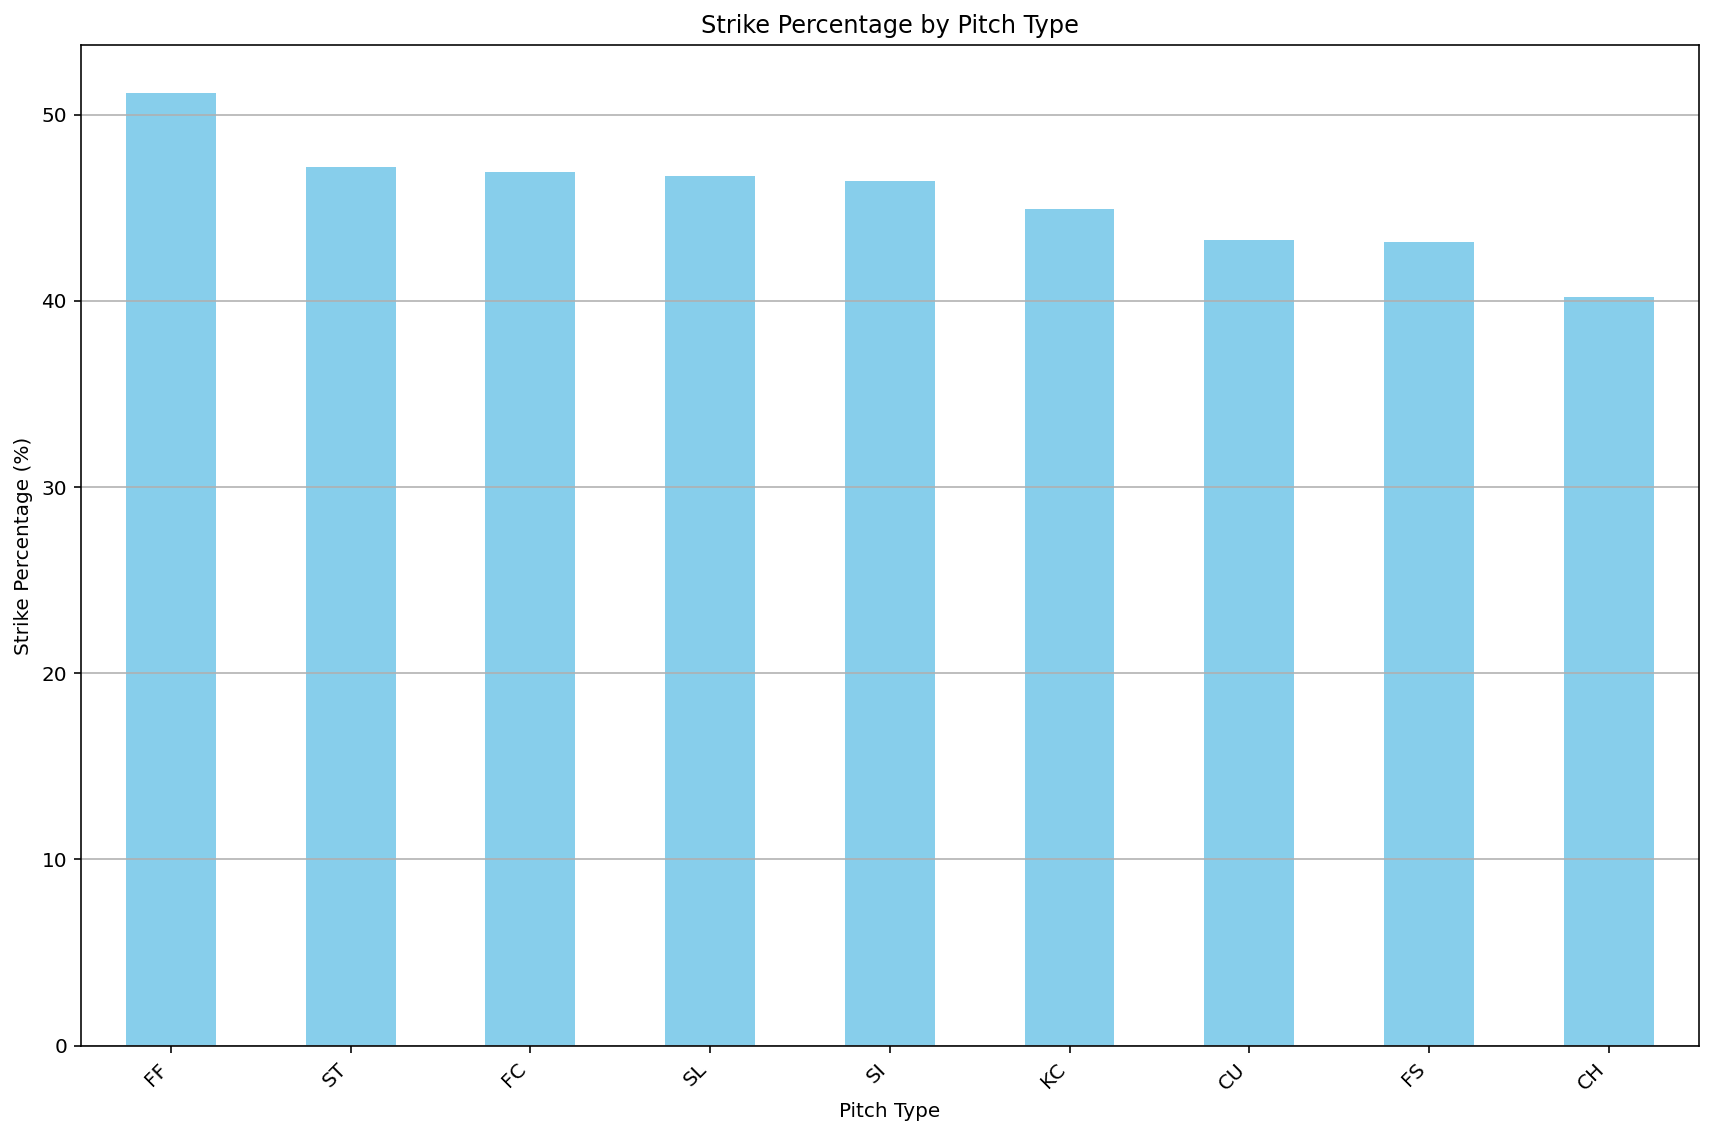

In [8]:
# Calculate overall strike percentages for each pitch type
pitch_counts = df['pitch_type'].value_counts()
valid_pitch_types = pitch_counts[pitch_counts >= 100].index

strike_counts = df[df['type'] == 'S'].groupby('pitch_type').size()
total_counts = df.groupby('pitch_type').size()
strike_percentages = (strike_counts / total_counts) * 100

# Filter to include only pitch types thrown at least 100 times
strike_percentages = strike_percentages[valid_pitch_types]

# Sort by strike percentage in descending order
strike_percentages_sorted = strike_percentages.sort_values(ascending=False)

# Plotting the sorted strike percentages
plt.figure(figsize=(12, 8))
strike_percentages_sorted.plot(kind='bar', color='skyblue')
plt.title('Strike Percentage by Pitch Type')
plt.xlabel('Pitch Type')
plt.ylabel('Strike Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [9]:
def determine_count_status(row):
    balls = row['balls']
    strikes = row['strikes']
    
    if balls == 0 and strikes == 0:
        return 'Even'
    elif balls > 0 and strikes == 0:
        return 'Ahead'
    elif balls == 0 and strikes > 0:
        return 'Behind'
    else:
        return 'Even'  # Handle other cases as needed

# Apply the function to create a new column 'count_status'
df['count_status'] = df.apply(determine_count_status, axis=1)

# Calculate strike percentage for each pitch type thrown by the pitcher
pitcher_strike_percentages = df[df['pitcher'] == 'Pitcher_ID']['type'].value_counts(normalize=True) * 100
print("Pitcher's Strike Percentages:")
print(pitcher_strike_percentages)

# Calculate batting average (BA) or other relevant metrics against each pitch type for a specific hitter
hitter_batting_average = df[df['batter'] == 'Batter_ID'].groupby('pitch_type')['events'].value_counts(normalize=True) * 100
print("Hitter's Batting Average Against Each Pitch Type:")
print(hitter_batting_average)

# Example: Determine pitch sequence when ahead or behind in the count
ahead_count_sequence = df[(df['count_status'] == 'Ahead') & (df['inning'] <= 6)].groupby('pitch_type')['events'].value_counts(normalize=True) * 100
print("Pitch Sequence When Ahead in the Count:")
print(ahead_count_sequence)

# Example: Analyze effectiveness of different pitches in specific counts
count_effectiveness = df[df['count_status'] == 'Even'].groupby('pitch_type')['type'].value_counts(normalize=True) * 100
print("Pitch Effectiveness in Even Counts:")
print(count_effectiveness)

# Example: Combine fastball with changeup or breaking ball sequences
pitch_combinations = df[(df['pitch_type'].isin(['FA', 'CH', 'SL'])) & (df['inning'] >= 7)].groupby('pitch_type')['events'].value_counts(normalize=True) * 100
print("Pitch Combinations in Late Innings:")
print(pitch_combinations)

# Example: Set up breaking ball after fastball sequence against a specific hitter
setup_sequence = df[(df['batter'] == 'Batter_ID') & (df['pitch_type'] == 'FA')].groupby('pitch_type')['events'].value_counts(normalize=True) * 100
print("Setting Up Pitches Against a Specific Hitter:")
print(setup_sequence)

# Example: Adapt pitch sequences based on observed hitter reactions
adapt_sequence = df[(df['pitcher'] == 'Pitcher_ID') & (df['inning'] >= 7)].groupby('pitch_type')['events'].value_counts(normalize=True) * 100
print("Adapting Pitch Sequences in Late Innings:")
print(adapt_sequence)



Pitcher's Strike Percentages:
Series([], Name: proportion, dtype: float64)
Hitter's Batting Average Against Each Pitch Type:
Series([], Name: proportion, dtype: float64)
Pitch Sequence When Ahead in the Count:
pitch_type  events                   
CH          field_out                    50.000000
            single                       18.181818
            home_run                     13.636364
            double                        6.818182
            force_out                     4.545455
            sac_fly                       4.545455
            walk                          2.272727
CU          field_out                    58.333333
            single                       16.666667
            home_run                      8.333333
            double                        8.333333
            hit_by_pitch                  8.333333
FC          field_out                    62.790698
            single                       11.627907
            walk                      

# example: pitching to Yordan Alvarez



Pitch Frequency to Yordan Alvarez:
pitch_type
FF    34
SI    21
SL    13
ST    10
CH     9
FS     5
CU     4
FC     3
SV     1
Name: count, dtype: int64
Pitch Sequences to Yordan Alvarez:
pitch_type
[FF]    34
[SI]    21
[SL]    13
[ST]    10
[CH]     9
[FS]     5
[CU]     4
[FC]     3
[SV]     1
Name: count, dtype: int64


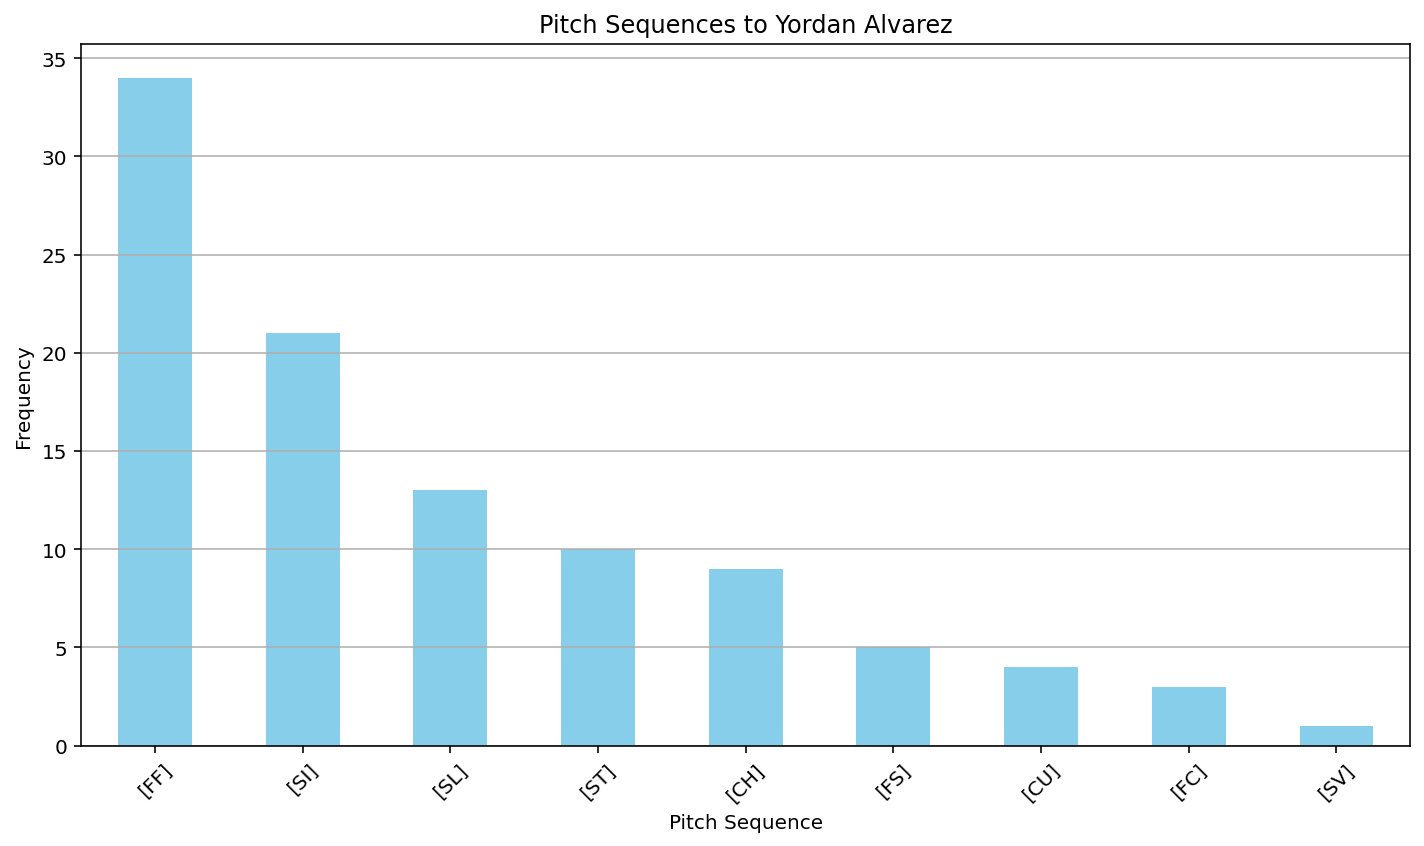

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


yordan_df = df[df['batter'] == 676694]

# Calculate pitch frequency to Yordan Alvarez
pitch_counts = yordan_df['pitch_type'].value_counts()
print("Pitch Frequency to Yordan Alvarez:")
print(pitch_counts)

# Group pitch types into sequences
pitch_sequences = yordan_df.groupby(yordan_df.index)['pitch_type'].apply(list)

# Count sequences and display
sequence_counts = pitch_sequences.value_counts()
print("Pitch Sequences to Yordan Alvarez:")
print(sequence_counts)

# Plotting pitch sequences
plt.figure(figsize=(10, 6))
sequence_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Pitch Sequences to Yordan Alvarez')
plt.xlabel('Pitch Sequence')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [11]:
import pandas as pd

# Filter data for the specific batter using their ID (replace with actual ID)
batter_id = 676694
ex_df = df[df['batter'] == batter_id].copy()  # Make a copy to avoid SettingWithCopyWarning

# Define mapping of pitch types to numerical codes
pitch_type_map = {
    'SI': 1,   # Example mapping, replace with actual codes as needed
    'FC': 2,
    'CU': 3,
    'SL': 4,
    'CH': 5,
    'FF': 6,
    'FT': 7,
    'KC': 8,
    'FS': 9,
    'KN': 10,
    'EP': 11,
    'FO': 12,
    'PO': 13,
    'SC': 14,
    'UN': 15
}

# Convert pitch_type to numerical form
ex_df['pitch_type_code'] = ex_df['pitch_type'].map(pitch_type_map)

# Initialize variables to store sequences and strike percentages
sequences = []
strike_percentages = []

# Iterate through the DataFrame to generate sequences and calculate metrics
for i in range(len(ex_df) - 2):
    # Check if all three pitches in the window have numerical codes
    if all(pd.notnull(ex_df.iloc[i:i+3]['pitch_type_code'])):
        sequence = ','.join(ex_df.iloc[i:i+3]['pitch_type'])
        strike_percentage = (ex_df.iloc[i:i+3]['type'] == 'S').mean() * 100

        sequences.append(sequence)
        strike_percentages.append(strike_percentage)

# Create a new DataFrame with sequences and strike percentages
sequence_metrics = pd.DataFrame({
    'pitch_sequence': sequences,
    'strike_percentage': strike_percentages
})

# Filter sequences with at least 3 occurrences
sequence_metrics = sequence_metrics[sequence_metrics.groupby('pitch_sequence')['strike_percentage'].transform('size') >= 3]

if not sequence_metrics.empty:
    # Group by pitch_sequence and calculate mean strike percentage
    sequence_metrics = sequence_metrics.groupby('pitch_sequence').mean().reset_index()

    # Sort sequences by strike percentage in descending order
    sequence_metrics = sequence_metrics.sort_values(by='strike_percentage', ascending=False)

    # Display top sequences
    print("Top Three-Pitch Sequences based on Strike Percentage:")
    print(sequence_metrics.head(10))
else:
    print("No sequences with sufficient data points found.")





Top Three-Pitch Sequences based on Strike Percentage:
  pitch_sequence  strike_percentage
0       FF,CH,FF          77.777778
1       FF,FF,FF          61.904762
3       FF,SI,SI          55.555556
5       SL,SL,SL          55.555556
4       SL,FF,FF          50.000000
2       FF,FF,SL          33.333333


In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# Initialize an empty list to store pitch sequences
pitch_sequences = []

# Loop through each row to create pitch sequences
for i in range(len(ex_df)):
    # Extract the rolling window of pitch_name values
    pitch_window = ex_df['pitch_name'].iloc[max(0, i-2):i+1]  # Selects the last 3 values including current index i
    
    # Drop NaN values and convert to string
    pitch_sequence = ','.join(pitch_window.dropna())
    
    # Append the pitch sequence to the list
    pitch_sequences.append(pitch_sequence)

# Assign the pitch sequences to the DataFrame
ex_df['pitch_sequence'] = pitch_sequences

# Ensure 'is_top_sequence' column is properly calculated
top_sequences = ex_df['pitch_sequence'].value_counts().nlargest(10).index
ex_df['is_top_sequence'] = ex_df['pitch_sequence'].isin(top_sequences)

# Define outcome metric for statistical analysis
outcome_metric = 'post_bat_score'
# Calculate outcome metric for top sequences group
top_sequences_stats = ex_df[ex_df['is_top_sequence']].groupby('pitch_sequence')[outcome_metric].mean()

# Calculate outcome metric for other sequences group
other_sequences_stats = ex_df[~ex_df['is_top_sequence']].groupby('pitch_sequence')[outcome_metric].mean()

# Perform statistical test
t_stat, p_value = ttest_ind(top_sequences_stats.dropna(), other_sequences_stats.dropna(), equal_var=False)

# Display results
print("Statistical Analysis Results:")
print(f"{outcome_metric.capitalize()}:")
print(f"  t-statistic: {t_stat:.3f}")
print(f"  p-value: {p_value:.3f}")
print("  Significant at 5% level? ", "Yes" if p_value < 0.05 else "No")
print()



Statistical Analysis Results:
Post_bat_score:
  t-statistic: 1.707
  p-value: 0.096
  Significant at 5% level?  No



/tmp/ipykernel_352/2133748270.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pitch_sequence', y='delta_run_exp', data=ex_df, palette='Set3')


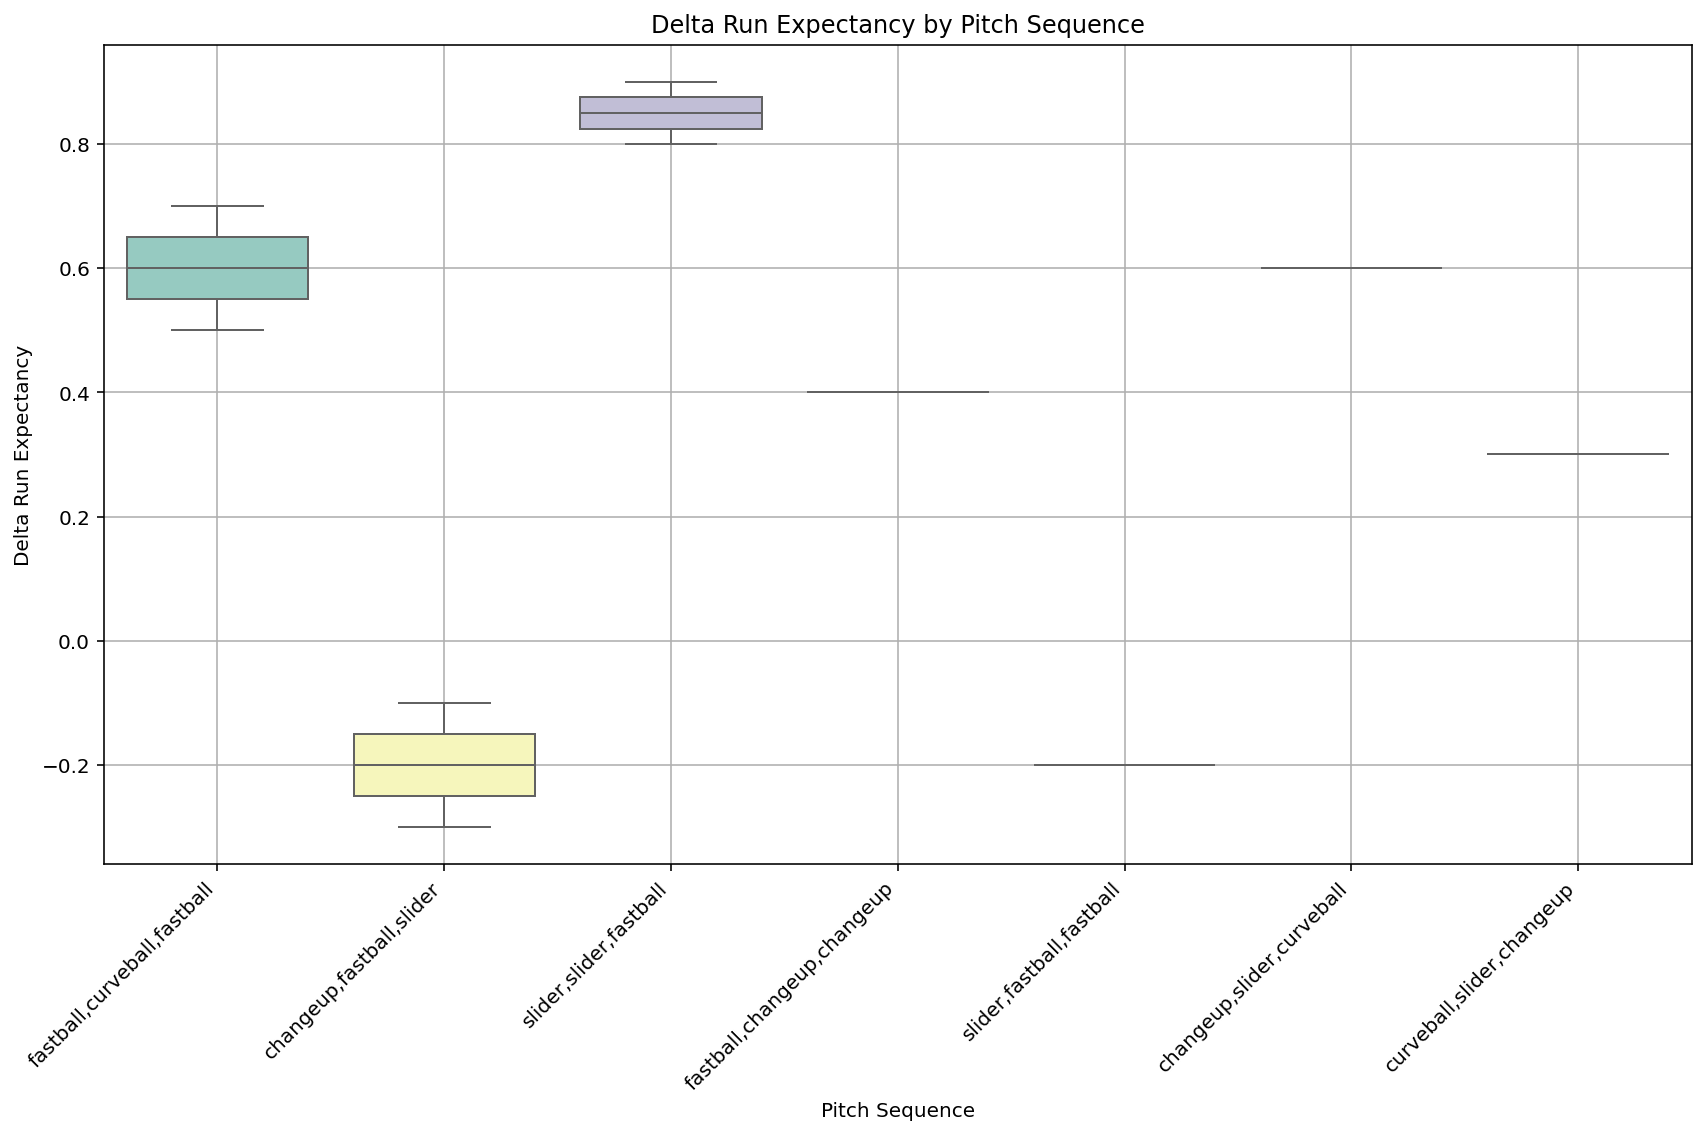

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Example data with more pitch sequences
data = {
    'pitch_sequence': ['fastball,curveball,fastball', 'changeup,fastball,slider', 'slider,slider,fastball',
                       'fastball,curveball,fastball', 'changeup,fastball,slider', 'slider,slider,fastball',
                       'fastball,changeup,changeup', 'slider,fastball,fastball', 'changeup,slider,curveball',
                       'curveball,slider,changeup'],
    'delta_run_exp': [0.5, -0.3, 0.8, 0.7, -0.1, 0.9, 0.4, -0.2, 0.6, 0.3]
}

ex_df = pd.DataFrame(data)

# Perform ANOVA
model = ols('delta_run_exp ~ C(pitch_sequence)', data=ex_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Extracting means for plotting
means = ex_df.groupby('pitch_sequence')['delta_run_exp'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.boxplot(x='pitch_sequence', y='delta_run_exp', data=ex_df, palette='Set3')
plt.title('Delta Run Expectancy by Pitch Sequence')
plt.xlabel('Pitch Sequence')
plt.ylabel('Delta Run Expectancy')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()





In [14]:
import pandas as pd

# Load the data from the uploaded CSV file
data = pd.read_csv('savant_data(1).csv')

# Recompute the transition probabilities if necessary

# Creating a transition matrix to analyze pitch sequences
pitch_types = data['pitch_type'].dropna().unique()
transition_matrix = pd.DataFrame(0, index=pitch_types, columns=pitch_types)

# Calculating the frequency of transitions between pitch types
for i in range(len(data) - 1):
    current_pitch = data.loc[i, 'pitch_type']
    next_pitch = data.loc[i + 1, 'pitch_type']
    if pd.notna(current_pitch) and pd.notna(next_pitch):
        transition_matrix.loc[current_pitch, next_pitch] += 1

# Normalizing the transition matrix to get probabilities
transition_matrix_prob = transition_matrix.div(transition_matrix.sum(axis=1), axis=0)

# Step 1: Identify the most likely next pitch type based on the current pitch
most_likely_next_pitch = transition_matrix_prob.idxmax(axis=1)

# Initialize a list to keep track of whether the batter swings at the most likely next pitch
swings_at_most_likely_next_pitch = []

# Iterate through the dataset to determine if the batter swings at the most likely next pitch
for i in range(len(data) - 1):
    current_pitch = data.loc[i, 'pitch_type']
    next_pitch = data.loc[i + 1, 'pitch_type']
    swing = data.loc[i + 1, 'description']  # 'description' column indicates the type of action on the next pitch
    if pd.notna(current_pitch) and pd.notna(next_pitch) and pd.notna(swing):
        most_likely_pitch = most_likely_next_pitch[current_pitch]
        if next_pitch == most_likely_pitch and ('swing' in swing.lower() or 'foul' in swing.lower() or 'hit' in swing.lower()):
            swings_at_most_likely_next_pitch.append(True)
        else:
            swings_at_most_likely_next_pitch.append(False)
    else:
        swings_at_most_likely_next_pitch.append(False)

# Add a column to the dataframe indicating if the batter swings at the most likely next pitch
data['swings_at_most_likely_next_pitch'] = [False] + swings_at_most_likely_next_pitch

# Step 3: Analyze the delta_run_exp values
swings_data = data[data['swings_at_most_likely_next_pitch']]
no_swings_data = data[~data['swings_at_most_likely_next_pitch']]

# Calculate mean delta_run_exp for swings and no swings
mean_delta_run_exp_swings = swings_data['delta_run_exp'].mean()
mean_delta_run_exp_no_swings = no_swings_data['delta_run_exp'].mean()

mean_delta_run_exp_swings, mean_delta_run_exp_no_swings

(-0.016532518337408313, 0.006051894011861489)

In [15]:
import scipy.stats as stats

# Calculate mean and standard deviation
mean_swings = swings_data['delta_run_exp'].mean()
std_swings = swings_data['delta_run_exp'].std()

mean_no_swings = no_swings_data['delta_run_exp'].mean()
std_no_swings = no_swings_data['delta_run_exp'].std()

# Perform an independent t-test
t_stat, p_value = stats.ttest_ind(swings_data['delta_run_exp'].dropna(), no_swings_data['delta_run_exp'].dropna(), equal_var=False)

# Output results
print(f"Mean delta_run_exp when swinging at the most likely next pitch: {mean_swings}")
print(f"Mean delta_run_exp when not swinging at the most likely next pitch: {mean_no_swings}")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Mean delta_run_exp when swinging at the most likely next pitch: -0.016532518337408313
Mean delta_run_exp when not swinging at the most likely next pitch: 0.006051894011861489
T-statistic: -4.1546481996760365
P-value: 3.31387176598377e-05


In [16]:
# Identify hits
hit_descriptions = ['single', 'double', 'triple', 'home_run']
data['is_hit'] = data['description'].apply(lambda x: any(hit in x.lower() for hit in hit_descriptions))

# Calculate hit rates
hit_rate_swings = data[data['swings_at_most_likely_next_pitch']]['is_hit'].mean()
hit_rate_no_swings = data[~data['swings_at_most_likely_next_pitch']]['is_hit'].mean()

# Output results
print(f"Hit rate when swinging at the most likely next pitch: {hit_rate_swings}")
print(f"Hit rate when not swinging at the most likely next pitch: {hit_rate_no_swings}")


Hit rate when swinging at the most likely next pitch: 0.0
Hit rate when not swinging at the most likely next pitch: 0.0


In [17]:
# Extracting sequences of 2 pitches and their corresponding delta_run_exp and hit rates
from collections import defaultdict

# Initialize dictionaries to store sequences and their metrics
sequence_delta_run_exp = defaultdict(list)
sequence_hits = defaultdict(list)

# Iterate through the dataset to create sequences of 2 pitches
for i in range(len(data) - 1):
    current_pitch = data.loc[i, 'pitch_type']
    next_pitch = data.loc[i + 1, 'pitch_type']
    delta_run_exp = data.loc[i + 1, 'delta_run_exp']
    is_hit = data.loc[i + 1, 'is_hit'] if 'is_hit' in data.columns else False
    
    if pd.notna(current_pitch) and pd.notna(next_pitch):
        sequence = (current_pitch, next_pitch)
        sequence_delta_run_exp[sequence].append(delta_run_exp)
        sequence_hits[sequence].append(is_hit)

# Calculate average delta_run_exp and hit rate for each sequence
sequence_metrics = []

for sequence in sequence_delta_run_exp:
    avg_delta_run_exp = sum(sequence_delta_run_exp[sequence]) / len(sequence_delta_run_exp[sequence])
    hit_rate = sum(sequence_hits[sequence]) / len(sequence_hits[sequence])
    sequence_metrics.append((sequence, avg_delta_run_exp, hit_rate))

# Convert to DataFrame for better readability
sequence_metrics_df = pd.DataFrame(sequence_metrics, columns=['Sequence', 'Avg_Delta_Run_Exp', 'Hit_Rate'])

# Sort sequences by Avg_Delta_Run_Exp (ascending) and Hit_Rate (ascending)
best_sequences_by_run_exp = sequence_metrics_df.sort_values(by='Avg_Delta_Run_Exp')
best_sequences_by_hit_rate = sequence_metrics_df.sort_values(by='Hit_Rate')

best_sequences_by_run_exp.head(10), best_sequences_by_hit_rate.head(1000)


(     Sequence  Avg_Delta_Run_Exp  Hit_Rate
 122  (EP, FF)          -0.261250       0.0
 117  (SL, EP)          -0.234000       0.0
 127  (SI, FA)          -0.213000       0.0
 87   (KC, FS)          -0.191333       0.0
 65   (SV, ST)          -0.185000       0.0
 57   (FC, SV)          -0.184909       0.0
 44   (FC, KN)          -0.146857       0.0
 105  (ST, SV)          -0.135000       0.0
 68   (CH, SV)          -0.132900       0.0
 97   (SV, CU)          -0.082286       0.0,
      Sequence  Avg_Delta_Run_Exp  Hit_Rate
 0    (SI, SI)           0.010464       0.0
 97   (SV, CU)          -0.082286       0.0
 96   (KN, SV)           0.091000       0.0
 95   (CU, KN)          -0.015667       0.0
 94   (CH, KC)          -0.027311       0.0
 ..        ...                ...       ...
 37   (CH, FC)           0.042423       0.0
 36   (SI, FF)           0.002037       0.0
 35   (CH, SL)           0.000271       0.0
 49   (FC, CH)           0.008609       0.0
 133  (CU, SV)          -0.0290

In [18]:
# Step 1: Review the descriptions
print(data['description'].unique())

# Step 2: Update the logic to identify hits
hit_descriptions = ['single', 'double', 'triple', 'home_run']
data['is_hit'] = data['description'].apply(lambda x: any(hit in x.lower() for hit in hit_descriptions))

# Verify if hits are identified correctly
print(data['is_hit'].value_counts())

# Step 3: Calculate hit rates again
hit_rate_swings = data[data['swings_at_most_likely_next_pitch']]['is_hit'].mean()
hit_rate_no_swings = data[~data['swings_at_most_likely_next_pitch']]['is_hit'].mean()

# Output results
print(f"Hit rate when swinging at the most likely next pitch: {hit_rate_swings}")
print(f"Hit rate when not swinging at the most likely next pitch: {hit_rate_no_swings}")


['ball' 'foul' 'blocked_ball' 'hit_into_play' 'swinging_strike'
 'called_strike' 'swinging_strike_blocked' 'hit_by_pitch' 'foul_tip'
 'foul_bunt' 'missed_bunt' 'pitchout']
is_hit
False    25000
Name: count, dtype: int64
Hit rate when swinging at the most likely next pitch: 0.0
Hit rate when not swinging at the most likely next pitch: 0.0


In [19]:

hit_events = ['single', 'double', 'triple', 'home_run']
if 'events' in data.columns:
    data['is_hit'] = data['events'].apply(lambda x: str(x).lower() in hit_events if pd.notna(x) else False)
else:
    # If 'events' column is not present, use 'hit_into_play' from the 'description' column as an indicator for hits
    data['is_hit'] = data['description'].apply(lambda x: x.lower() == 'hit_into_play')

# Verify if hits are identified correctly
print(data['is_hit'].value_counts())

# Step 2: Calculate hit rates again
hit_rate_swings = data[data['swings_at_most_likely_next_pitch']]['is_hit'].mean()
hit_rate_no_swings = data[~data['swings_at_most_likely_next_pitch']]['is_hit'].mean()

# Output results
print(f"Hit rate when swinging at the most likely next pitch: {hit_rate_swings}")
print(f"Hit rate when not swinging at the most likely next pitch: {hit_rate_no_swings}")


is_hit
False    23547
True      1453
Name: count, dtype: int64
Hit rate when swinging at the most likely next pitch: 0.10709046454767726
Hit rate when not swinging at the most likely next pitch: 0.04854136776661884


In [20]:
import scipy.stats as stats

# Calculate hit rates for each sequence group
hit_rate_swings = data[data['swings_at_most_likely_next_pitch']]['is_hit'].mean()
hit_rate_no_swings = data[~data['swings_at_most_likely_next_pitch']]['is_hit'].mean()

# Extract the delta_run_exp for each group
delta_run_exp_swings = data[data['swings_at_most_likely_next_pitch']]['delta_run_exp'].dropna()
delta_run_exp_no_swings = data[~data['swings_at_most_likely_next_pitch']]['delta_run_exp'].dropna()

# Perform ANOVA analysis
f_stat, p_value = stats.f_oneway(delta_run_exp_swings, delta_run_exp_no_swings)

f_stat, p_value


(28.55219288665441, 9.200438974549359e-08)